<a href="https://colab.research.google.com/github/FatimaShenno/ML-Projects/blob/main/Credit_Card_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Credit Card Segmentation**

# Importing libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

import warnings
warnings.filterwarnings('ignore')

# Get Data

In [40]:
data = pd.read_csv('/content/CC GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Data Exploration

In [41]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [42]:
data.shape

(8950, 18)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [44]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [45]:
data.isnull().sum().sort_values(ascending = False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [46]:
data.duplicated().sum()

0

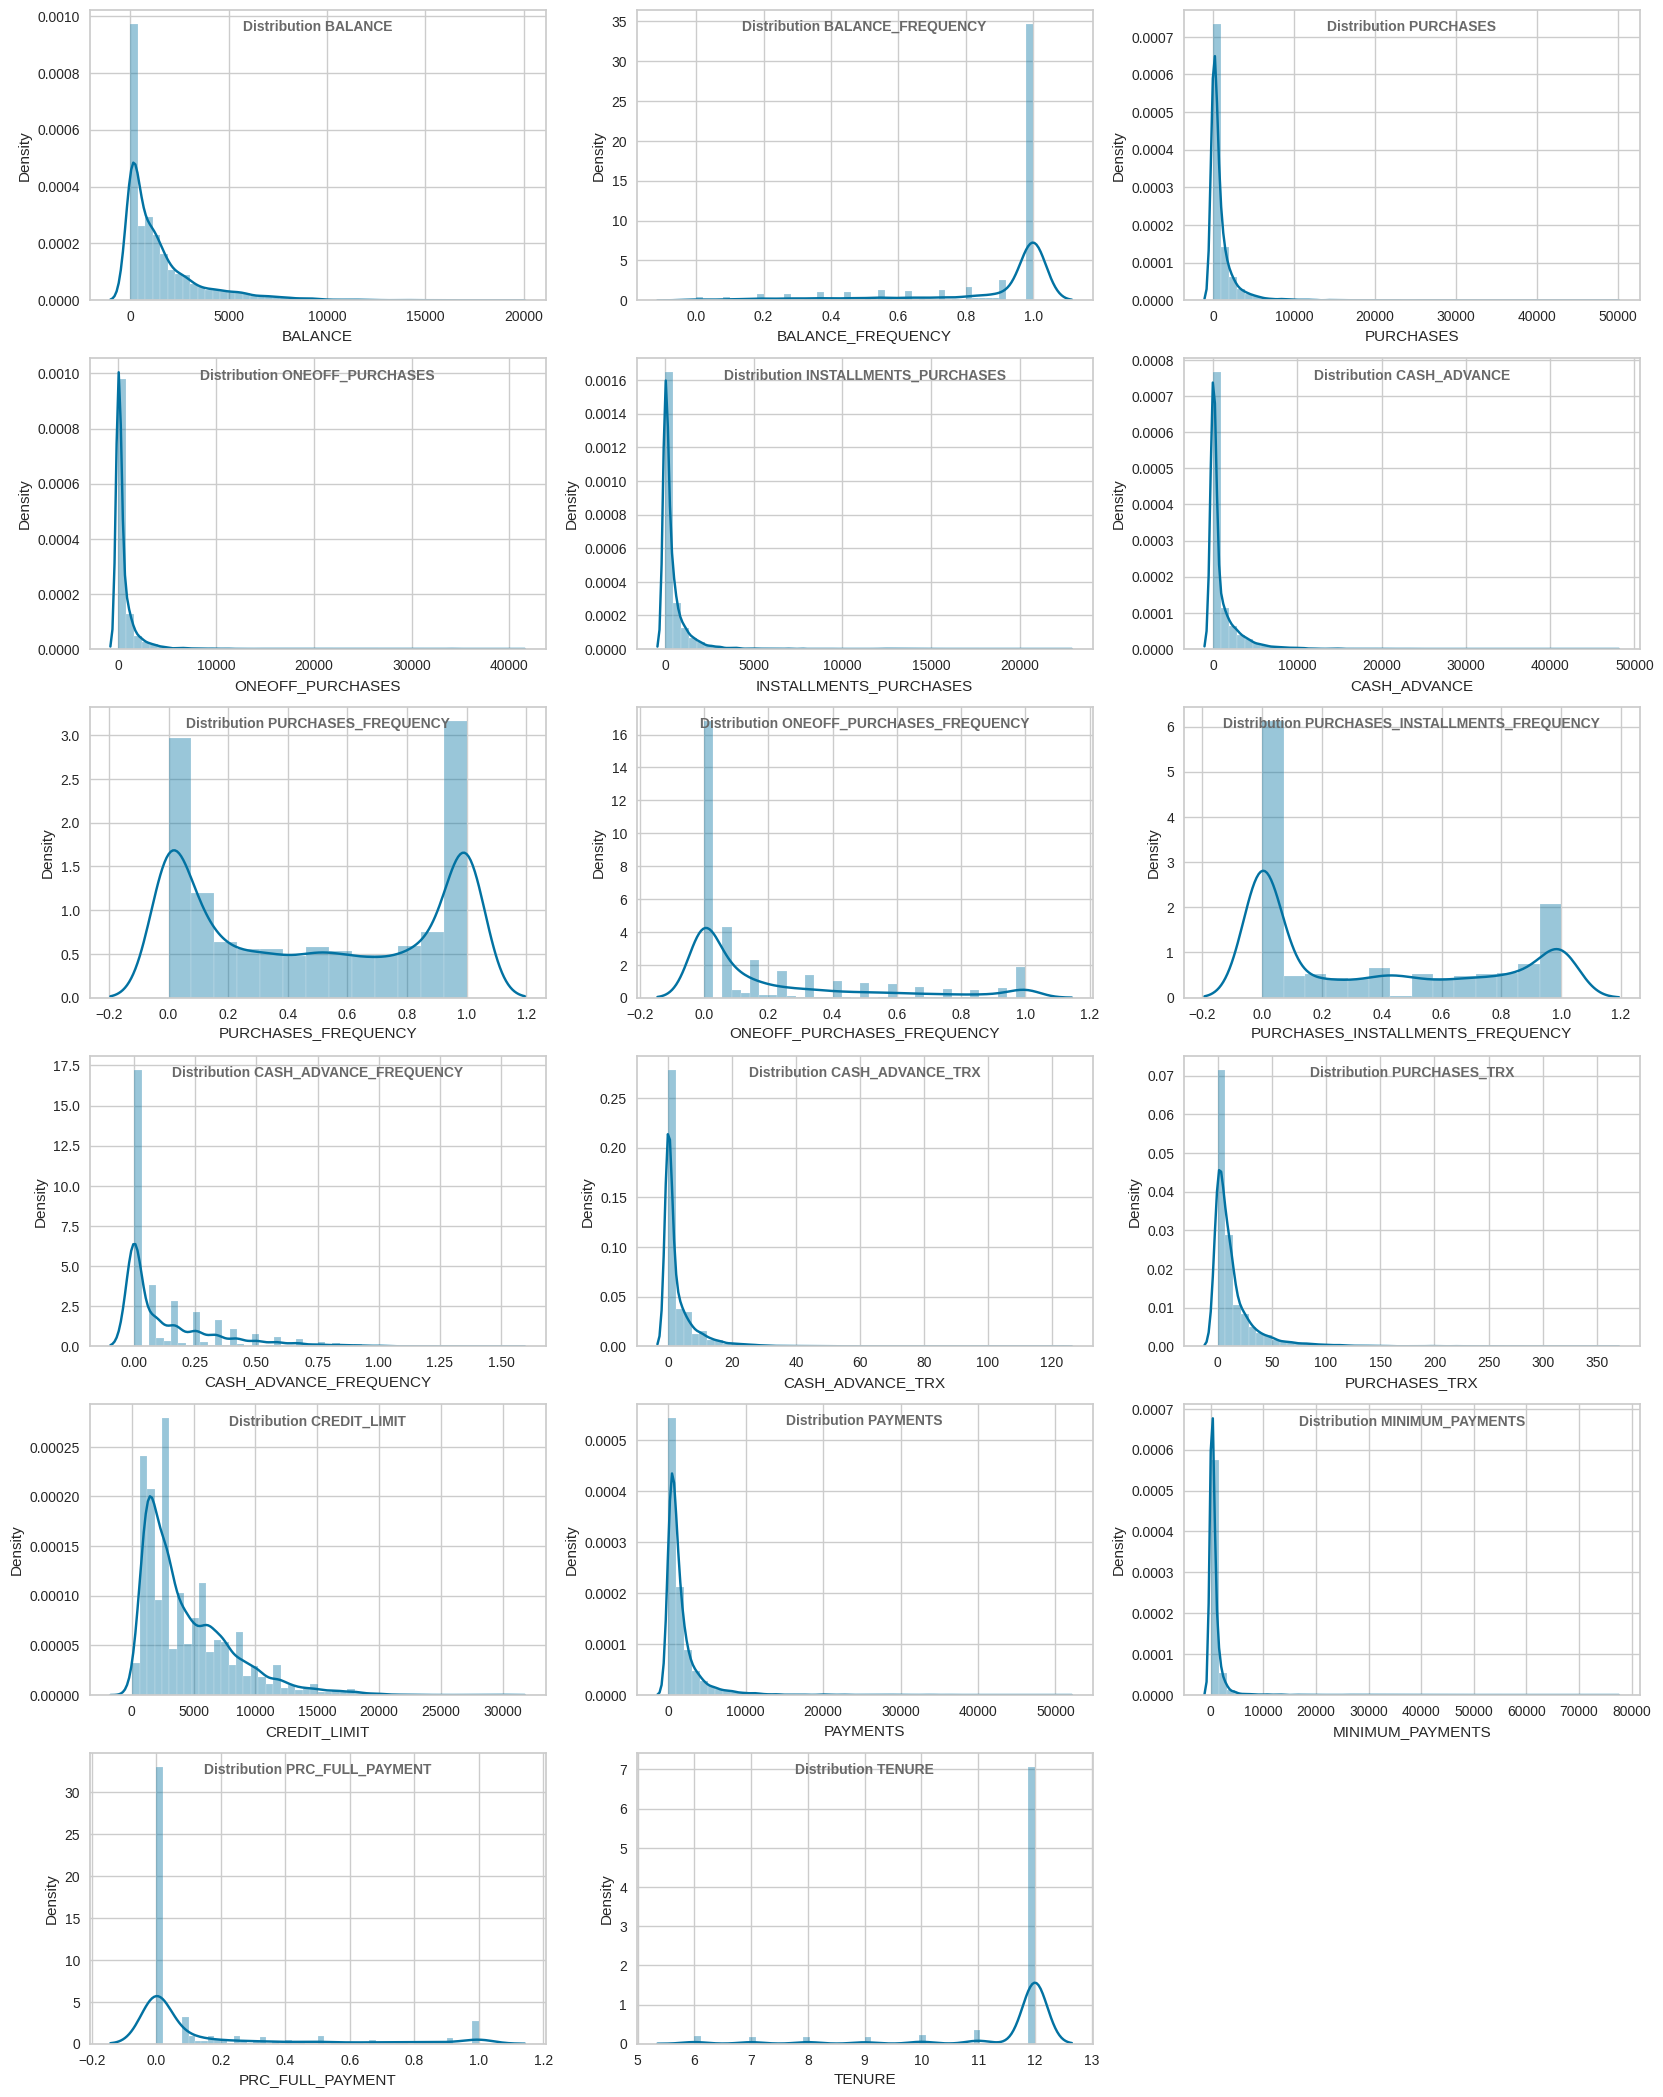

In [47]:
n_c = list(data.select_dtypes(include=['float64', 'int64']).columns)
plt.figure(figsize = (20,40))
x = 1
for column in n_c:
    plt.subplot(9, 3, x)
    sns.distplot(data[column])
    plt.title('Distribution {}'.format(column), fontsize=10, color ='dimgrey', fontweight = 'bold', y=0.90)
    x += 1

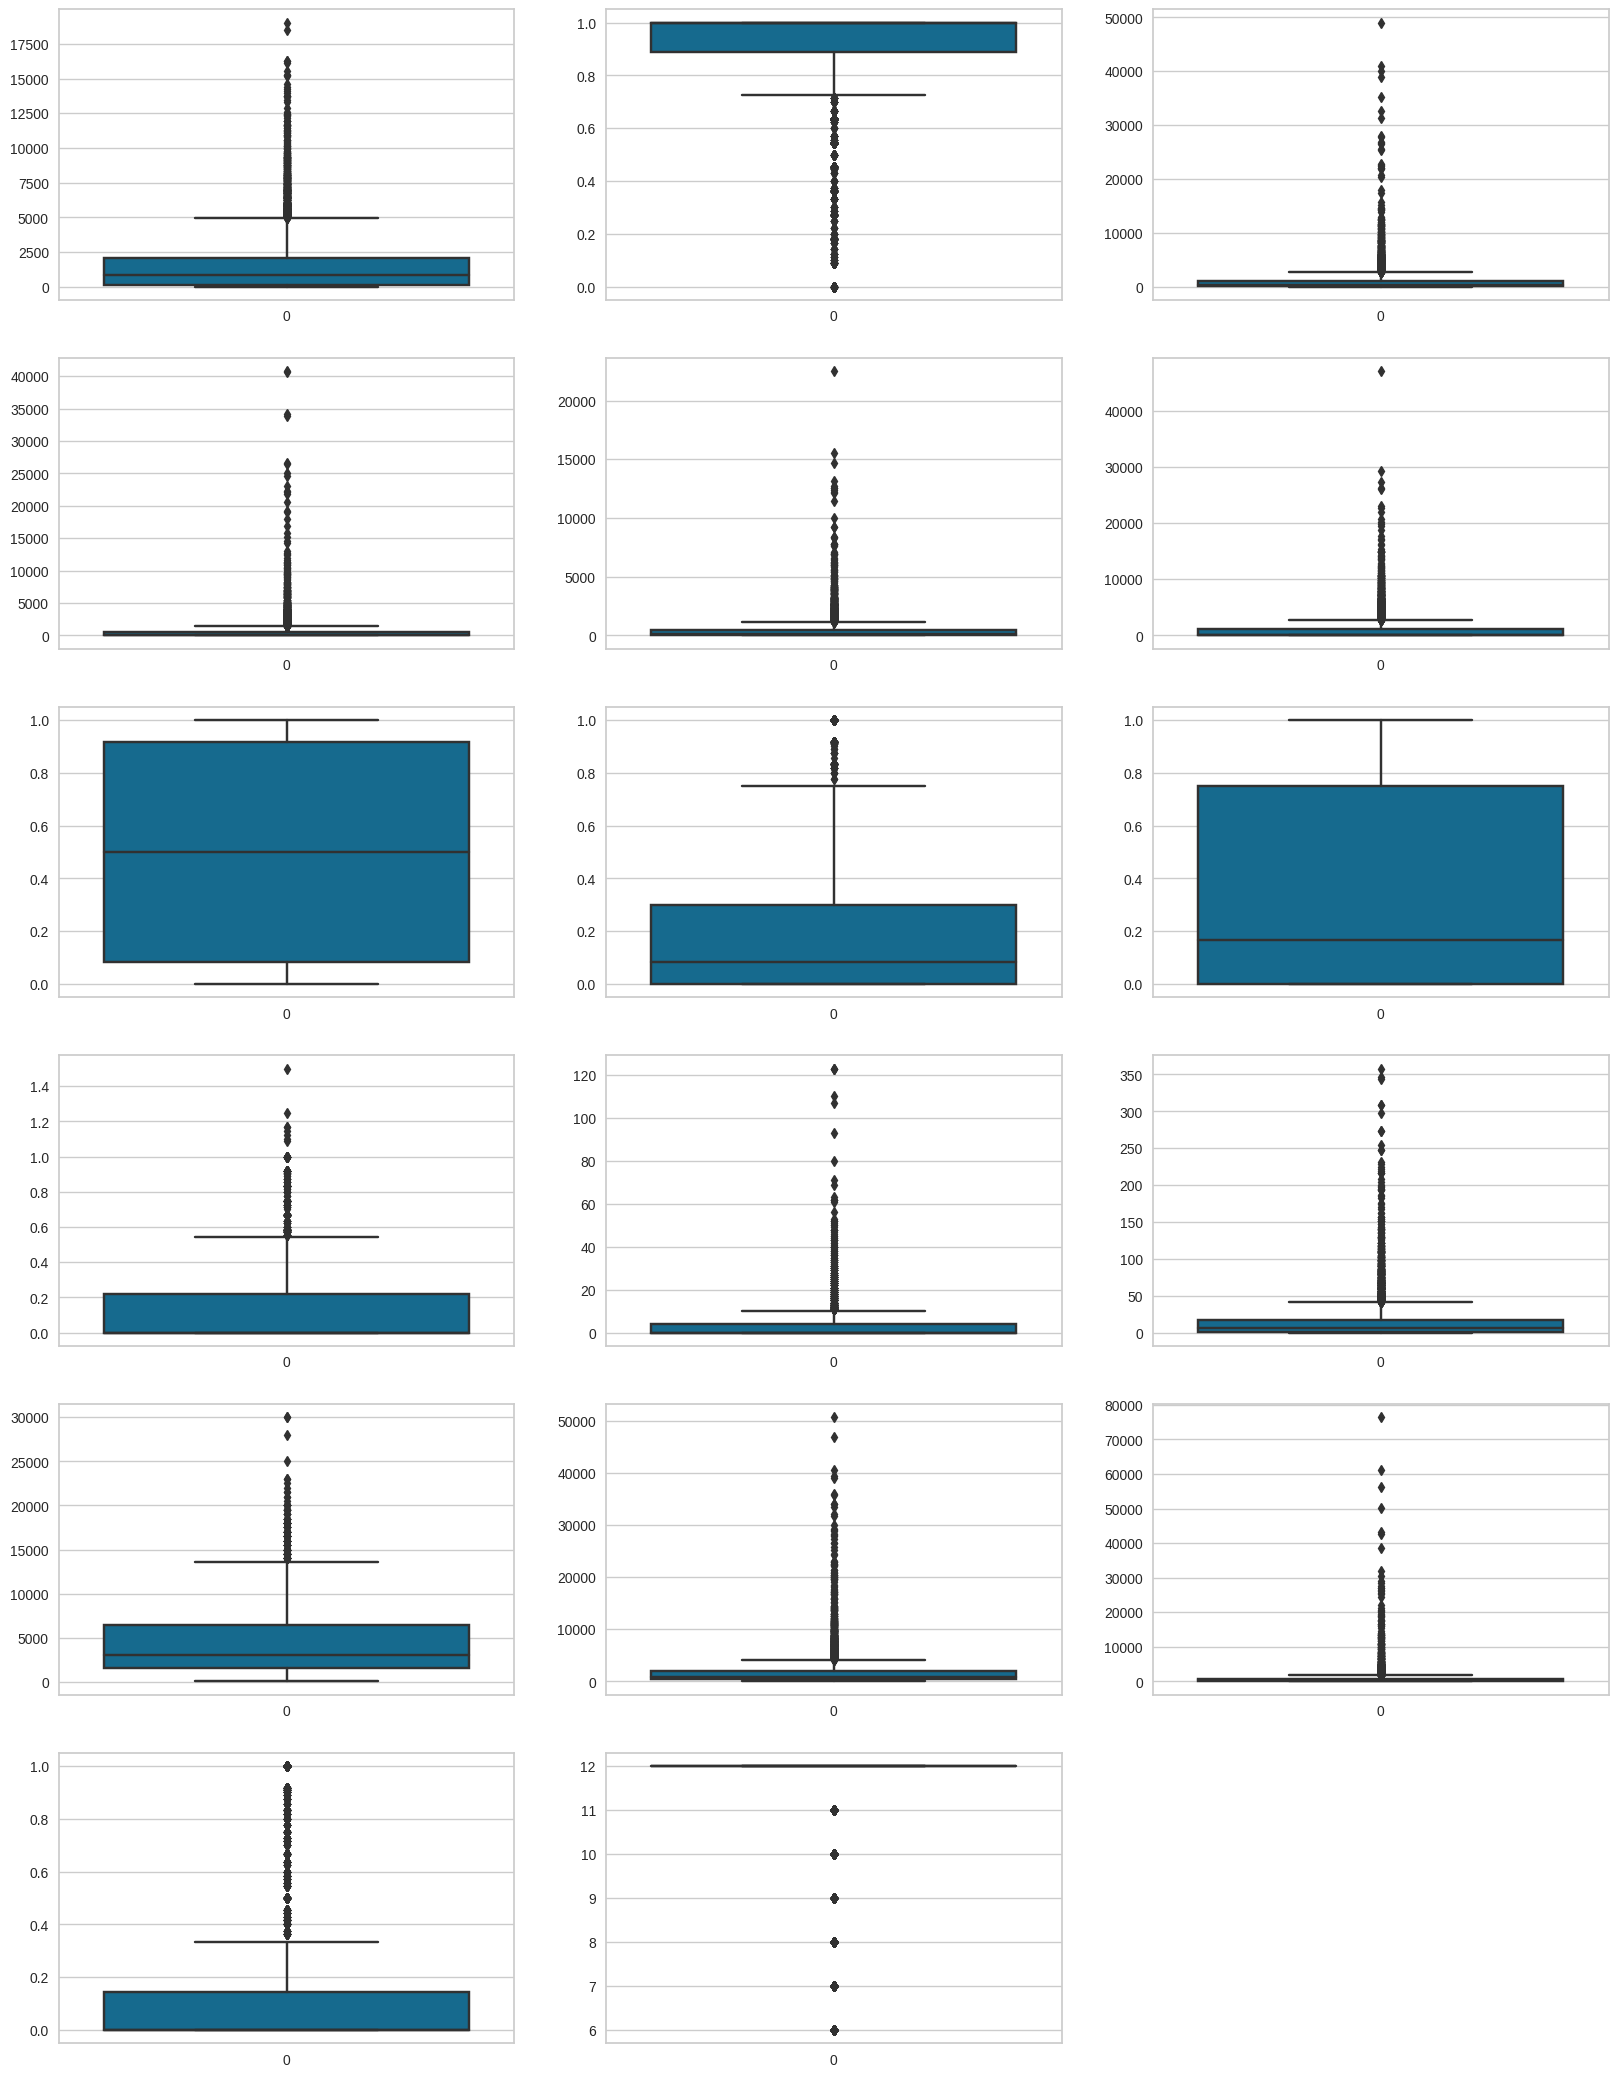

In [48]:
plt.figure(figsize = (20,40))
x = 1
for column in n_c:
    plt.subplot(9, 3, x)
    sns.boxplot(data[column])
    x += 1

In [49]:
data.corr().loc['MINIMUM_PAYMENTS'].sort_values(ascending = False)

MINIMUM_PAYMENTS                    1.000000
BALANCE                             0.398684
CASH_ADVANCE                        0.140107
BALANCE_FREQUENCY                   0.132569
INSTALLMENTS_PURCHASES              0.132172
CREDIT_LIMIT                        0.126671
PAYMENTS                            0.126651
CASH_ADVANCE_TRX                    0.109739
CASH_ADVANCE_FREQUENCY              0.098838
PURCHASES_TRX                       0.096333
PURCHASES                           0.093860
TENURE                              0.059444
ONEOFF_PURCHASES                    0.048755
PURCHASES_INSTALLMENTS_FREQUENCY    0.030073
PURCHASES_FREQUENCY                 0.003030
ONEOFF_PURCHASES_FREQUENCY         -0.030327
PRC_FULL_PAYMENT                   -0.140379
Name: MINIMUM_PAYMENTS, dtype: float64

# Data Processing

In [50]:
data.drop(['CUST_ID'], axis=1, inplace=True)

In [51]:
data.CREDIT_LIMIT.fillna(value=data.CREDIT_LIMIT.mean(),inplace=True)
data.MINIMUM_PAYMENTS.fillna(value=data.MINIMUM_PAYMENTS.mean(),inplace=True)

In [52]:
data.isnull().sum().sort_values(ascending=False)

BALANCE                             0
CASH_ADVANCE_FREQUENCY              0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
PURCHASES_INSTALLMENTS_FREQUENCY    0
BALANCE_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
TENURE                              0
dtype: int64

In [53]:
data.shape

(8950, 17)

<Axes: >

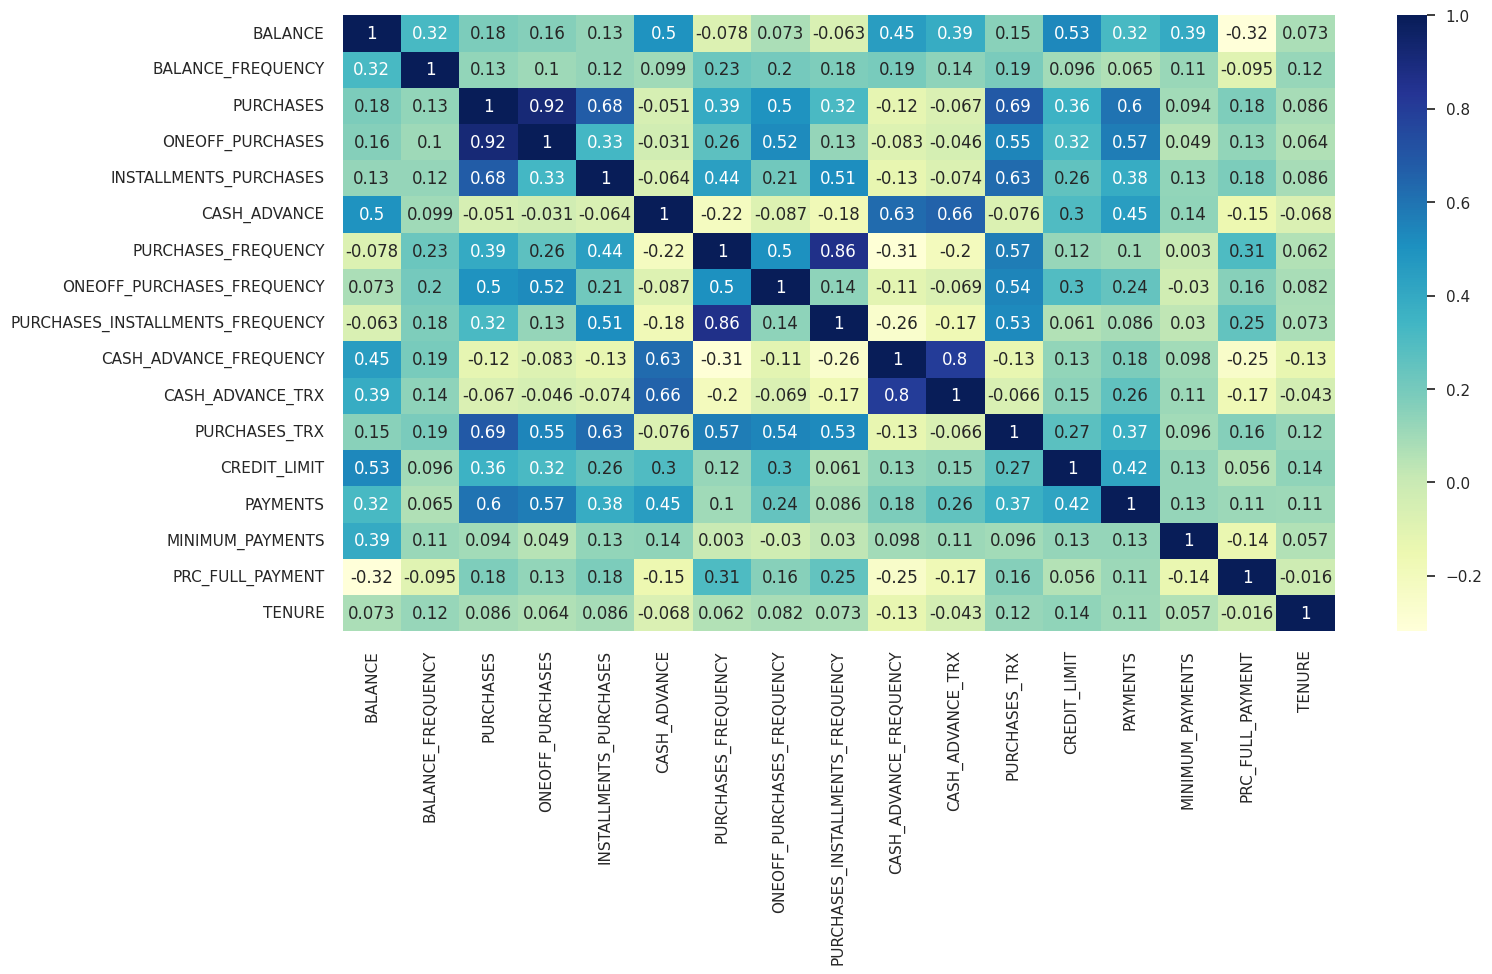

In [54]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = data.corr()
sns.heatmap(corr,annot=True, cmap="YlGnBu")

Strong Corr
CASH_ADVANCE_FREQUENCE & CASH_ADVANCE_TRX

PURCHASES_FREQUENCY & PURCHASES_INSTALLMENTS_FREQUENCY    

ONEOFF_PURCHASES & PURCHASES


# Scaling and Transformation

In [55]:
scaler =  RobustScaler().fit(data)
df_scale = scaler.fit_transform(data)
df_scale = pd.DataFrame(df_scale,columns= data.columns) 
df_scale

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.432267,-1.636364,-0.248371,-0.065812,0.013657,0.000000,-0.399999,-0.277777,-0.111112,0.000000,0.00,-0.3125,-0.408163,-0.431595,-0.282857,0.000000,0.0
1,1.209374,-0.818182,-0.337489,-0.065812,-0.189912,5.784542,-0.600000,-0.277777,-0.222223,1.125001,1.00,-0.4375,0.816327,2.138626,1.062541,1.555556,0.0
2,0.842099,0.000000,0.384766,1.273231,-0.189912,0.000000,0.600000,3.055557,-0.222223,0.000000,0.00,0.3125,0.918367,-0.154715,0.420649,0.000000,0.0
3,0.411913,-3.272727,1.062798,2.530286,-0.189912,0.184759,-0.500000,0.000000,-0.222223,0.374999,0.25,-0.3750,0.918367,-0.564547,0.762355,0.000000,0.0
4,-0.028907,0.000000,-0.322542,-0.038102,-0.189912,0.000000,-0.500000,0.000000,-0.222223,0.000000,0.00,-0.3750,-0.367347,-0.117644,-0.131012,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.438709,0.000000,-0.065540,-0.065812,0.431293,0.000000,0.600000,-0.277777,0.888888,0.000000,0.00,-0.0625,-0.408163,-0.350037,-0.413561,3.500004,-6.0
8946,-0.443544,0.000000,-0.057245,-0.065812,0.450241,0.000000,0.600000,-0.277777,0.888888,0.000000,0.00,-0.0625,-0.408163,-0.382803,0.762355,0.000000,-6.0
8947,-0.441355,-1.500005,-0.202598,-0.065812,0.118215,0.000000,0.399999,-0.277777,0.666667,0.000000,0.00,-0.1250,-0.408163,-0.511003,-0.365198,1.750002,-6.0
8948,-0.446517,-1.500005,-0.337489,-0.065812,-0.189912,0.032823,-0.600000,-0.277777,-0.222223,0.750002,0.50,-0.4375,-0.510204,-0.529925,-0.403653,1.750002,-6.0


In [56]:
df = df_scale.copy()

<!-- if you want to keep 95% of the variance in the original data after applying PCA, you can specify the float 0.95 to the hyperparameter n_components as follows. -->

# PCA

Method #1 to Select the Best Number of Principal Components for the Dataset

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df)
df_pca

array([[-2.47587198, -0.70991781, -0.854713  , ...,  0.59911393,
        -0.13784493,  0.53179418],
       [-0.70654352,  1.92690513,  3.73926843, ...,  1.5666897 ,
        -1.62550765, -1.03961294],
       [-0.08621626, -0.39876471, -0.48746371, ...,  0.51077303,
         0.32384034, -1.478662  ],
       ...,
       [-2.44930322, -1.25846545, -1.14397612, ..., -4.56925402,
        -2.76725344, -0.320169  ],
       [-2.78788222, -1.03512386, -0.53599833, ..., -4.70932376,
        -2.48805541,  0.21053974],
       [-0.70489417, -1.52899059, -0.29842187, ..., -5.27386988,
        -1.20453234, -1.54783621]])

In [58]:
pca.n_components_

9

In [59]:
df_pca.shape

(8950, 9)

# Modeling

# K-Mean

Elpow Method

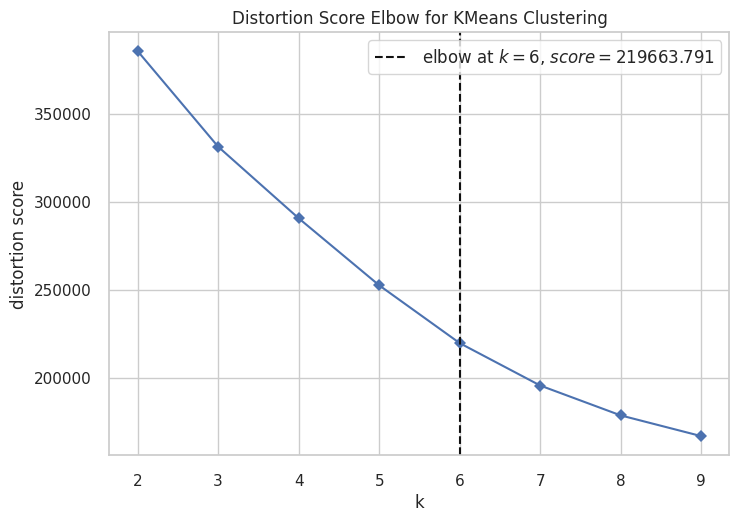

In [60]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=18)
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)

visualizer.fit(df_pca)
visualizer.show()
plt.show();

To the graph above, the ideal choice would be with 6 clusters.


In [61]:
# Evaluating metrics for several different cluster values


n_clusters = []
silhouette = []
calinski_harabasz = []
davies_bouldin = []
inertia = []

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster, random_state = 18)
    pred = kmeans.fit_predict(df_pca)

    silhouette.append(silhouette_score(df_pca, pred))
    calinski_harabasz.append(calinski_harabasz_score(df_pca, pred))
    davies_bouldin.append(davies_bouldin_score(df_pca, pred))
    inertia.append(kmeans.inertia_)
    n_clusters.append(n_cluster)
    
    
result = pd.DataFrame({
    'Clusters': n_clusters,
    'Silhouette': silhouette,
    'Calinski Harabasz': calinski_harabasz,
    'Davies Bouldin': davies_bouldin,
    'Inertia': inertia})

result.sort_values('Silhouette', ascending=False)

,Clusters,Silhouette,Calinski Harabasz,Davies Bouldin,Inertia
0,2,0.626415,1786.912393,1.403105,385440.065900
1,3,0.575540,1772.712030,1.043618,331176.952361
2,4,0.433343,1764.056702,1.037713,290539.018568
6,8,0.330763,2029.248152,0.940801,178638.351996
7,9,0.327373,1979.310395,1.045725,166875.929600
5,7,0.326598,2033.296577,1.010345,195591.812157
3,5,0.320054,1859.418673,1.096985,252478.883780
8,10,0.309388,1960.446731,1.058796,155505.735075
4,6,0.299887,1976.787110,1.066472,219663.944320


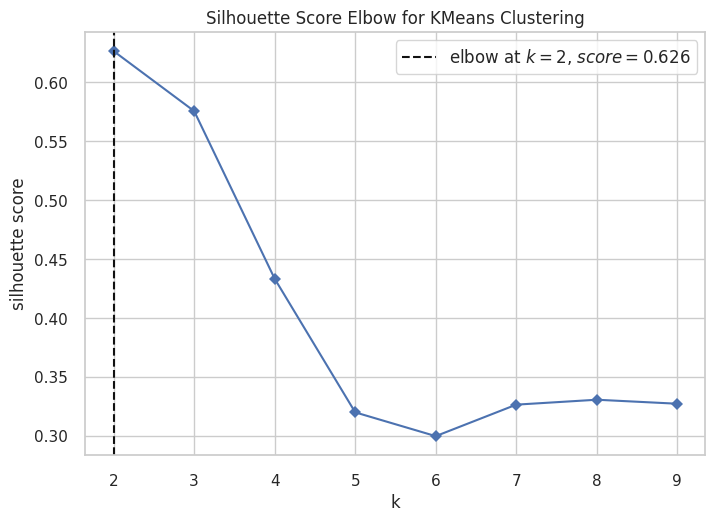

In [62]:
model = KMeans(random_state=18)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)

visualizer.fit(df_pca)
visualizer.show()
plt.show();


In [ ]:
# Metrics
metrics = []

kmeans = KMeans(n_clusters= 2, random_state = 18)
pred = kmeans.fit_predict(df_pca)

model = 'K-Means'
n_clusters = 2
silhouette = silhouette_score(df_pca, pred)
calinski_harabasz = calinski_harabasz_score(df_pca, pred)
davies_bouldin = davies_bouldin_score(df_pca, pred)

metrics.append((model, n_clusters, silhouette, calinski_harabasz, davies_bouldin))

df_kmn = pd.DataFrame(metrics, columns=['Model', 'Number of Clusters', 'Silhouette', 'Calinski Harabasz', 'Davies Bouldin'])

df_kmn

,Model,Number of Clusters,Silhouette,Calinski Harabasz,Davies Bouldin
0,K-Means,2,0.626415,1786.912393,1.403105


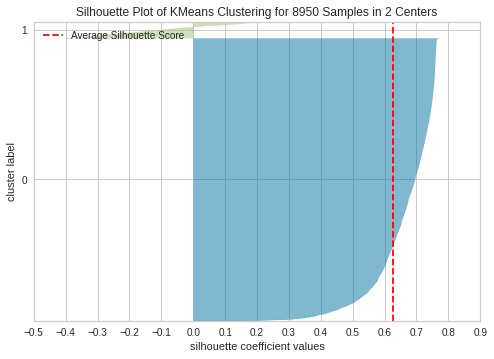

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(n_clusters=2, random_state=18)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df_pca)
visualizer.show()
plt.show();

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=18)
kmeans.fit(df_pca)
labels = kmeans.labels_

In [ ]:
df_kmean = df.copy()

In [ ]:
df_kmean['cluster'] = labels

In [ ]:
df_kmean['cluster'].value_counts()

0    8485
1     465
Name: cluster, dtype: int64

<AxesSubplot:>

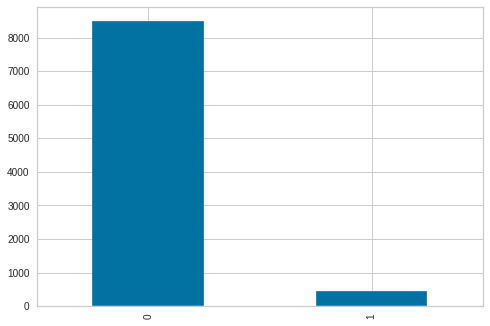

In [ ]:
df_kmean.cluster.value_counts().plot.bar()

# DBSCAN

To find the best combination between these two parameters, we will use GridSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import DBSCAN

param_grid = {'eps':[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10], 'min_samples':[2,5,10, 20, 30, 40, 50, 60, 70]}

dbscan = DBSCAN()

grid_search = GridSearchCV(dbscan, param_grid, scoring=silhouette_score)

grid_search.fit(df_pca)

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'eps': 0.01, 'min_samples': 2}


In [ ]:
dbscan = DBSCAN(eps=0.01, min_samples=2).fit(df_pca)
labels = dbscan.labels_

In [ ]:
silhoutte_scores = silhouette_score(df_pca, labels) 
print("Silhoutte_scores = " , silhoutte_scores)

Silhoutte_scores =  -0.3980176883665012


In [ ]:
np.unique(dbscan.labels_)


array([-1,  0,  1,  2])

In [ ]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 8943


In [ ]:
eps_min = 0.1; eps_max = 17
points_min = 2; point_max = 10

In [ ]:
db_best = -1
eps_best = 0
samples= 0
i = eps_min
while i <= eps_max :
    for j in range(points_min, points_min+1, 1):
        db = DBSCAN(eps = i, min_samples = j).fit(df_pca)
        score = silhouette_score(df_pca, db.labels_)
        if score > db_best:
            db_best = score
            eps_best = i
            samples = j
    i+=0.1
db_best

0.8852025839458437

In [ ]:
print('Best epsilon value = ', i)
print('Best min_samples value = ', j)

Best epsilon value =  17.099999999999973
Best min_samples value =  2


In [ ]:
print(f'Estimated number of clusters (k): {len(set(db.labels_))}')
print(f'Estimated number of noise points: {list(db.labels_).count(-1)}')
print(f'Silhoutte_scores = {db_best}')

Estimated number of clusters (k): 3
Estimated number of noise points: 9
Silhoutte_scores = 0.8852025839458437


In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 17, min_samples = 2).fit(df_pca)
print(silhouette_score(df_pca, db.labels_))

0.8852025839458437


In [ ]:
df_bscan = df.copy()

In [ ]:
df_bscan['cluster'] = db.labels_

In [ ]:
df_bscan['cluster'].value_counts()

 0    8939
-1       9
 1       2
Name: cluster, dtype: int64

The value of -1 represents samples that have not been assigned to any cluster

# GMM


In [ ]:
from sklearn.mixture import GaussianMixture 
gmm_model = GaussianMixture(n_components = 2)
gmm_model.fit(df_pca)
labels=gmm_model.predict(df_pca)

In [ ]:
silhoutte_scores = silhouette_score(df_pca, labels) 
print("Silhoutte_scores = " , silhoutte_scores)

Silhoutte_scores =  0.3130828979426886


# Agglomerative Clustering


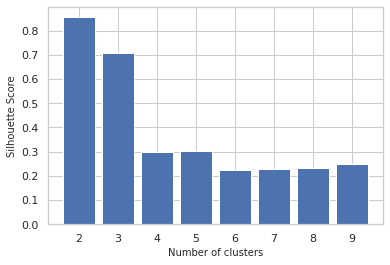

In [ ]:
from sklearn.cluster import AgglomerativeClustering

silhouette_scores = [] 

for n_cluster in range(2, 10):
    silhouette_scores.append( 
        silhouette_score(df_pca, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(df_pca))) 
    
k = [2, 3, 4, 5, 6,7,8,9] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [ ]:
hirearchy_model = AgglomerativeClustering(n_clusters  = 2)
hirearchy_model.fit(df_pca)
label=hirearchy_model.fit_predict(df_pca)

In [ ]:
silhoutte_scores = silhouette_score(df_pca, label) 
print("Silhoutte_scores = " , silhoutte_scores)

Silhoutte_scores =  0.8552325270526745
